In [1]:
#Import the frequently used libraries
#Import necessary modules to read, clean, analyse and visualise data

import csv
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import re
import string
from textblob import TextBlob


In [2]:
pip install ekphrasis

Processing ./.cache/pip/wheels/f7/ec/0d/12659e32faf780546945d0120f2c8410eb3efb7426731da88f/ekphrasis-0.5.1-py3-none-any.whl
Processing ./.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2/termcolor-1.1.0-py3-none-any.whl
Processing ./.cache/pip/wheels/49/1c/fc/8b19700f939810cd8fd9495ae34934b246279791288eda1c31/ftfy-5.8-py3-none-any.whl
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached ujson-4.0.1-cp37-cp37m-manylinux1_x86_64.whl (179 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordsegment

  Using cached wordsegment-1.3.1-py2.py3-none-any.whl (4.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Import necessary packages for textual and sentiment analysis 

import nltk

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


#These functions are used for preprocessing mainly
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
data_con = pd.read_csv("Twitter_final_11.csv", sep=',' , encoding='latin-1')

In [6]:
data_con.head()

,timestamp,hashtags,tweets,replies,retweets,likes,username,location,friends,followers,verified,all_hashtags,all_hashtags_seg,tweets_clean,tweets_token,tweets_nonstop,tags_token,tags_nonstop,label
0,2020-11-01 23:41:04,peace,#cubans #Latinos #Hispanics #blackvoter this #...,3.0,1,1,plzhelpkids,"Anywhere, usa",900,157,0,cubans Latinos Hispanics blackvoter ElectionDa...,cubans latinos hispanics black voter election ...,this is in your hands we must stop g...,"['this', 'is', 'in', 'your', 'hands', 'we', 'm...","['hands', 'must', 'stop', 'go', 'let', 'happen...","['cubans', 'latinos', 'hispanics', 'black', 'v...","['cubans', 'latinos', 'hispanics', 'black', 'v...",USA
1,2020-11-01 23:22:00,peace,Democratic Governors: \n\nSeriously consider c...,NaN,NaN,2,bluestatestuff,Rip City USA,23.1K,21.7K,0,StaySafe DenounceViolence StrongerTogether2020...,stay safe denounce violence stronger together ...,Democratic Governors Seriously consider callin...,"['democratic', 'governors', 'seriously', 'cons...","['democratic', 'governors', 'seriously', 'cons...","['stay', 'safe', 'denounce', 'violence', 'stro...","['stay', 'safe', 'denounce', 'violence', 'stro...",USA
2,2020-11-01 22:51:16,peace,While the #democrats allowed #criminals to loo...,2.0,NaN,NaN,SecretShopper10,NaN,57,18,0,democrats criminals America Trump peacetreatie...,democrats criminals america trump peace treati...,While the allowed to loot kill burn Presid...,"['while', 'the', 'allowed', 'to', 'loot', 'kil...","['allowed', 'loot', 'kill', 'burn', 'president...","['democrats', 'criminals', 'america', 'trump',...","['democrats', 'criminals', 'america', 'trump',...",USA
3,2020-11-01 22:35:54,peace,#PeaceForAmenians #RecognizeArtsakh \n#peace,1.0,NaN,1,AnnaRostomyan,NaN,13,2,0,PeaceForAmenians RecognizeArtsakh peace,peace foramen ians recognize artsakh peace,,[],[],"['peace', 'foramen', 'ians', 'recognize', 'art...","['peace', 'foramen', 'ians', 'recognize', 'art...",Azerbaijan_Armenia
4,2020-11-01 21:51:56,peace,"#Obama hat mit 26.171 Bomben, 7 LÃ¤nder bombar...",NaN,NaN,3,DCStudiosProd,NaN,192,44,0,Obama Syria Iraq Libya Yemen Somalia Afghanist...,obama syria iraq libya yemen somalia afghanist...,hat mit Bomben LÃ¤nder bombardiert Zahl...,"['hat', 'mit', 'bomben', 'lÃ¤nder', 'bombardie...","['hat', 'mit', 'bomben', 'lÃ¤nder', 'bombardie...","['obama', 'syria', 'iraq', 'libya', 'yemen', '...","['obama', 'syria', 'iraq', 'libya', 'yemen', '...",USA


In [7]:
last_tweet=data_con.iloc[0].timestamp
first_tweet=data_con.iloc[-1].timestamp
format_date="%Y-%m-%d %H:%M:%S"
time_span=datetime.strptime(last_tweet, format_date)-datetime.strptime(first_tweet, format_date)
print("Tweets were collected over the time of:", time_span)
print('The first tweet was postet on:', first_tweet, 'and the last tweet was posted on:', last_tweet)

Tweets were collected over the time of: -10 days, 7:53:14
The first tweet was postet on: 2020-11-11 15:47:50 and the last tweet was posted on: 2020-11-01 23:41:04


In [8]:
from ekphrasis.classes.segmenter import Segmenter
from wordsegment import load, segment
load()
segment('thisisatest hello how are you')

['this', 'is', 'a', 'test', 'hello', 'how', 'are', 'you']

In [9]:
#Pre-processing of hashtags

def preprocess_hashtags(hashtags):
    """This function will clean the hashtags through removal of the brackets 
    and converting all letters to the lower case for better understanding. 
    Punctuations will be removed as well followed by tokenisation of each hashtag"""
    hashtags=hashtags.replace('[','') #Replaces the brackets
    hashtags=hashtags.replace(']','')
    hashtags=hashtags.translate(str.maketrans('', '', string.punctuation)) #makestrans() translates each punctutation to none = ''
    #The following tokenisation is not necessarily needed for the hashtags since no lemmatising/semantic analysis will be done. 
    hashtag_tokens=word_tokenize(hashtags.lower()) #word_tokenize returns a tokenised version with divided substrings and lower cases
    
    return " ".join(hashtag_tokens) #Joins all tokenised substrings

#def segment_hashtags(string):
    #hashtag_tokens=segment(preprocess_hashtags(hashtags))
    #return hashtag_tokens

def segment_hashtags(string):
    string='  '.join(segment(preprocess_hashtags(hashtags)))
    hashtag_tokens=word_tokenize(string)
    return " ".join(hashtag_tokens)

#segment_hashtags(preprocess_hashtags(hashtags))
#Get the number of hashtags for each tweet

def hashtag_len(hashtags):
    """This function returns the number of hashtags used within a tweet"""
    hashtag_tokens=word_tokenize(hashtags) #Tokenisation is necessary to create substrings which then can be countet
    return len(hashtag_tokens)


#Prints out hashtags for each tweet and the number of hashtags used

for hashtags in data_con.all_hashtags:
    output_length = hashtag_len(segment_hashtags(hashtags)) #passes the output of the first function into the argument of the second function
    print(output_length)
    print(segment_hashtags(hashtags))
    #print(' '.join(segment(preprocess_hashtags(hashtags))))
    #print(" ")

17
cubans latinos hispanics black voter election day racism hate divide vote texas north carolina peace unity trump
8
stay safe denounce violence stronger together 2020bidenharris2020 peace
10
democrats criminals america trump peace treaties middle east peace media
6
peace foramen ians recognize artsakh peace
14
obama syria iraq libya yemen somalia afghanistan pakistan friedens nobel preis democrats biden peace
22
peace peaceful covid19covid19uk faith viral videos rest of mind christmas god is good god trending youtube understand enjoying everyday life restoration believe
9
truth covid19 peace trust god jesus public health emergency
14
god trump china joe biden corrupt school choice jobs safety opportunity zones peace christ
7
recognize artsakh peace stop azeri war crimes
6
november 2020 peace love election 2020covid
3
peace artsakh strong
21
a loving heart matters vote joe integrity matters vote biden harris character matters vote joe biden kindness matters voteblue2020 peace love
5
t

In [10]:
#Pre-processing of tweets

"""Stop words such as 'the', 'and', 'a' etc. should be excluded from our tweets.
This is due to several reasons: Stop words are very frequent and would interfere with our semantic and textual analysis 
as well as word classification. """

stop_words = set(stopwords.words('english')) #This function defines a set of stop words within the English language

"""The next cleaning step of tweet data includes regular expression operations, word_tokenize, 
WordNetLemmatizer and nltk.pos_tag from the nltk library"""

def preprocess_tweets(tweet):
    """This function will clean the tweets through several steps for better understanding and further analysis. 
    Steps include lowering cases, replacing punctuations, removal of b's, removal of special strings,
    removal of URLS, removal of hashtags and tags, removal of stopwords and tokenisation and lemmatisation of tweet words"""
    #Converts all uppercase characters into lowercase characters
    tweet=tweet.lower() 
    #Replaces &amp; with &
    tweet=tweet.replace('&amp;','&')
    #Removes the 'b'' or 'b"'  string at the beginning of each tweet
    tweet = re.sub(r"(b')|(b\")","",tweet, flags=re.MULTILINE)
    #Removes characters with random string and integer combinations, such as "\xe2x80x9c"
    tweet = re.sub(r'[0-9]*\\x+([a-z]|[0-9]|[\\])*[^A-Z]', "", tweet)
    #Removes URLs via regular expression operations. Any pattern that starts with http (or https... ) followed by one or more non-white-space characters will be removed
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    #Removes tags with '@' and hashtag character '#'
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Removes any punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Removes stopwords and tokenises tweet string to substrings
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #Defines lemmatizer using WordNetLemmatizer from nltk.stem
    lm = WordNetLemmatizer()
    #Lemmatises each pre-filtered tweet token with the correct POS (part of speech) tag 
    lemmatized_words = [lm.lemmatize(w, get_pos(w)) for w in filtered_words]

    return " ".join(lemmatized_words) #joins all tokenised and cleaned strings



"""nltk.pos_tag returns the POS tag for a given word (verb, noun etc.).
Get the correct nltk.pos_tag for each word with get_pos:"""

def get_pos(word):
        """Maps the POS tag to a character to pass it on via a dictionnary"""
        tag = nltk.pos_tag(word)[0][1][0].lower() #Returns the first string of the POS tag for the word (e.g. n,j,v)
        """WordNet is our lexical database which includes nouns, verbs, adjectives and adverbs. 
        Other words such as prepositions are ignored"""
        tagging_dict = {"j": wordnet.ADJ, #Creates dictionnary with POS tags which is needed for lemmatize()
                "n": wordnet.NOUN,
                "r": wordnet.ADV,
                "v": wordnet.VERB}
        return tagging_dict.get(tag, wordnet.NOUN) #value=wordnet.Noun if no other value is found for the tag

    
    
    
"""Next, we want to get the number of strings within each cleaned tweet"""  

def clean_tweet_len(tweet):
    """Returns the number of strings in a tweet"""
    tweet_tokens=word_tokenize(tweet)
    return len(tweet_tokens)



# Finally, we want to print our results to take a look:

for tweets in data_con.tweets:
    print(preprocess_tweets(tweets))
    print("")

cuban latino hispanic blackvoter electionday hand must stop racism hate divide go vote let happen texas northcarolina become acceptable voting bring peace unity march poll 113 stop trump

democratic governor seriously consider call national guard keep state safe staysafe denounceviolence strongertogether2020 bidenharris2020 peace

democrat allowed criminals loot kill burn america president trump impossible forming peacetreaties country middleeast peace people pay attention realize mainstream medium doesnt want focus

peaceforamenians recognizeartsakh peace

obama hat mit 26171 bomben 7 lã¤nder bombardiert syria iraq libya yemen somalia afghanistan pakistan zahllose unschuldige opfer sie werden zynisch kollateralschaden bezeichnet er sollte den friedensnobelpreis zurã¼ckgeben democrat biden peace

understand enjoy peace watch full video youtube peace peaceful covid19 covid19uk faith viral video restofmind christmas godisgood god trending youtube understand enjoyingeverydaylife restorati

After all the cleaning steps, we want to create a DataFrame with all columns that we find useful for our further analysis.

In [11]:
clean_tweets = data_con.loc[:,("username","followers","location")] #Creates DataFrame with original columns username and followers_count


clean_tweets['Clean_tweet'] = data_con['tweets'].apply(preprocess_tweets)#Adds a new column with cleaned tweets
clean_tweets['Clean_hashtags'] = data_con['all_hashtags'].apply(preprocess_hashtags) #Adds a new column with cleaned hashtags
clean_tweets['Hashtag_count'] = clean_tweets['Clean_hashtags'].apply(hashtag_len) #Adds a new column with number of hashtags for each tweet
clean_tweets['Word_count']= clean_tweets['Clean_tweet'].apply(clean_tweet_len)
#Adds a new column with number of strings within each tweet

In [12]:
def segment_hashtags(hashtag):
    string='  '.join(segment(hashtag))
    hashtag_tokens=word_tokenize(string)
    return " ".join(hashtag_tokens)

In [13]:
def segment_tweets(tweet):
    string='  '.join(segment(tweet))
    tweet_tokens=word_tokenize(string)
    return " ".join(tweet_tokens)

In [15]:
clean_tweets['Clean_hashtags'] = clean_tweets['Clean_hashtags'].apply(segment_hashtags)
clean_tweets['Hashtag_count'] = clean_tweets['Clean_hashtags'].apply(hashtag_len)

clean_tweets['Clean_tweet'] = clean_tweets['Clean_tweet'].apply(segment_tweets)
clean_tweets['Word_count']= clean_tweets['Clean_tweet'].apply(clean_tweet_len)

In [16]:
clean_tweets.Clean_tweet.tail()

532    rooting fearmuchsaywar2 reshaping consciousnes...
533    watch perilous journey get treatment war torn ...
534    ccpwarwustalkxijinpings claim biden admin le l...
535    veteran day flanders field fallujah may find p...
536    worldwatch us presidential struggle lot happen...
Name: Clean_tweet, dtype: object

In [17]:
#Remove rows with same Clean_tweet content
clean_tweets.drop_duplicates(subset="Clean_tweet",keep="first",inplace=True) #drops duplicates and keeps the first version of it

In [18]:
#Remove rows without location
clean_tweets = clean_tweets[clean_tweets['location'].notna()]

In [19]:
#drop rows with irrelevant words, ~ is for negation of operation
exclude_words = ['workplace','employees','company','coaching','fitness','music','parenting']
clean_tweets = clean_tweets[~clean_tweets.Clean_tweet.str.contains('|'.join(exclude_words))]
clean_tweets = clean_tweets[~clean_tweets.Clean_hashtags.str.contains('|'.join(exclude_words))]

In [20]:
clean_tweets.head()

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count
0,plzhelpkids,157,"Anywhere, usa",cuban latino hispanic black voter election day...,cubans latinos hispanics black voter election ...,17,28
1,bluestatestuff,21.7K,Rip City USA,democratic governor seriously consider call na...,stay safe denounce violence stronger together ...,8,18
5,pastorrichman1,"2,440","Lagos, Nigeria",understand enjoy peace watch full video youtub...,peace peaceful covid19covid19uk faith viral vi...,22,29
6,myjehovahrapha,245,United States,god bless protect emergency personnel hospital...,truth covid19 peace trust god jesus public hea...,9,30
7,JohnEWadeII,"1,747","New Orleans, US, 70130",dear god guide enthusiasm trump supporter tran...,god trump china joe biden corrupt school choic...,14,27


In [21]:
#new indexing so that removed duplicate row indeces won't be missing in further analysis 
clean_tweets.reset_index(drop=True, inplace=True) #drops the index

clean_tweets.index.values.max() #returns the last row index of the data set

298

In [22]:
"""This assert makes sure that there are as many unique tweets as number of rows"""

if not len(list(clean_tweets.Clean_tweet.unique())) == clean_tweets.shape[0]:
    assert False

In [23]:
"""This assert makes sure that the indexing is correct"""

if not clean_tweets.index.values.max() == (len(list(clean_tweets.Clean_tweet.unique()))-1): #-1 since indexing starts at 0
    assert False

In [24]:
len(clean_tweets.location.unique())

193

Now, we want to create a new column that decodes the latitude and longitude values for each country or city.

In [25]:
pip install geopandas

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached pyproj-3.0.0.post1-cp37-cp37m-manylinux2010_x86_64.whl (6.4 MB)
  Using cached Shapely-1.7.1-cp37-cp37m-manylinux1_x86_64.whl (1.0 MB)
  Using cached Fiona-1.8.18-cp37-cp37m-manylinux1_x86_64.whl (14.8 MB)
  Using cached cligj-0.7.1-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install geopy

  Using cached geopy-2.0.0-py3-none-any.whl (111 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
from geopy.geocoders import Nominatim

In [28]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Champ de Mars, Paris, France')
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

Latitude = 48.85614465, Longitude = 2.297820393322227


In [29]:
from geopy.extra.rate_limiter import RateLimiter

In [30]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
clean_tweets['geo_location'] = clean_tweets['location'].apply(geocode)
clean_tweets['point'] = clean_tweets['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)
clean_tweets[['latitude', 'longitude','altitude']] = pd.DataFrame(clean_tweets['point'].tolist(), index=clean_tweets.index)

In [31]:
clean_tweets.columns

Index(['username', 'followers', 'location', 'Clean_tweet', 'Clean_hashtags',
       'Hashtag_count', 'Word_count', 'geo_location', 'point', 'latitude',
       'longitude', 'altitude'],
      dtype='object')

In [32]:
clean_tweets.head(20)

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count,geo_location,point,latitude,longitude,altitude
0,plzhelpkids,157,"Anywhere, usa",cuban latino hispanic black voter election day...,cubans latinos hispanics black voter election ...,17,28,"(Anywhere Bicycle Repair, Opportunity Road, Ke...","(32.8256481, -117.1607283, 0.0)",32.825648,-117.160728,0.0
1,bluestatestuff,21.7K,Rip City USA,democratic governor seriously consider call na...,stay safe denounce violence stronger together ...,8,18,"(Rip Van Winkle Bridge, Catskill, Town of Cats...","(42.2242011, -73.8535331, 0.0)",42.224201,-73.853533,0.0
2,pastorrichman1,"2,440","Lagos, Nigeria",understand enjoy peace watch full video youtub...,peace peaceful covid19covid19uk faith viral vi...,22,29,"(Lagos, Lagos Island, 100242, Nigeria, (6.4550...","(6.4550575, 3.3941795, 0.0)",6.455057,3.394179,0.0
3,myjehovahrapha,245,United States,god bless protect emergency personnel hospital...,truth covid19 peace trust god jesus public hea...,9,30,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
4,JohnEWadeII,"1,747","New Orleans, US, 70130",dear god guide enthusiasm trump supporter tran...,god trump china joe biden corrupt school choic...,14,27,"(New Orleans, Orleans Parish, Louisiana, Unite...","(29.9499323, -90.0701156, 0.0)",29.949932,-90.070116,0.0
5,smarkosyan,87,"London, England",karabakh control azerbaijan mean karabakh with...,recognize artsakh peace stop azeri war crimes,7,19,"(London, Greater London, England, United Kingd...","(51.5073219, -0.1276474, 0.0)",51.507322,-0.127647,0.0
6,ginaBoom1yes,632,NeverthelessShePersisted MO/IL,hello november greeted feared hesitatingly lon...,november 2020 peace love election 2020covid,6,26,None,None,NaN,NaN,NaN
7,womenpowervote,28,USA,a loving heart matters vote joe integrity matt...,a loving heart matters vote joe integrity matt...,21,21,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
8,Hasmigz,304,"Ontario, Canada",artsakh strong peace for armenians peace,artsakh strong peace for armenians peace,6,6,"(Ontario, Canada, (50.000678, -86.000977))","(50.000678, -86.000977, 0.0)",50.000678,-86.000977,0.0
9,ICJUK,"1,993",Las Vegas,icj uk all over color print unisex union jane ...,icj uk all over color print unisex union jane ...,16,22,"(Las Vegas, Clark County, Nevada, United State...","(36.1672559, -115.1485163, 0.0)",36.167256,-115.148516,0.0


In [33]:
clean_tweets = clean_tweets[clean_tweets['geo_location'].notna()]
#clean_tweets = clean_tweets.drop(columns='point')
clean_tweets.reset_index(drop=True, inplace=True) #drops the index
clean_tweets.index.values.max() #returns the last row index of the data set

249

In [34]:
clean_string = ''.join(clean_tweets["Clean_tweet"])
clean_hasht = ''.join(clean_tweets["Clean_hashtags"])

#Frequency of most common terms in "Clean_tweet" is calculated

#Create a new DataFrame with tokenised words of all tweets
df_words = pd.DataFrame(nltk.tokenize.word_tokenize(clean_string), columns=["words"])
#Count the frequency of each word using value_counts()
word_freq = df_words["words"].value_counts() #This is a pandas.series


#Convert series to a dictionnairy to a dataframe
frame_word_freq = {"word": word_freq.index, "frequency": word_freq} #Creates a dictionnairy
df_word_freq = pd.DataFrame(frame_word_freq) #Creates a DataFrame 
df_word_freq.reset_index(drop=True, inplace=True) #Drops the original index 

#Drops all rows with words that appear less than 7 times
df_word_freq = df_word_freq.drop(df_word_freq[df_word_freq.frequency < 22].index) 



In [35]:
#Frequency of most common terms in "Clean_hashtags" is calculated

#Create a new DataFrame with tokenised words of all hashtags
df_hashtags = pd.DataFrame(nltk.tokenize.word_tokenize(clean_hasht), columns=["hashtags"])
#Count the frequency of each word using value_counts()
hasht_freq = df_hashtags["hashtags"].value_counts()


# hasht_freq is a series. It will be converted into a dataframe to easily create a barchart
frame_hasht_freq = {"hashtag": hasht_freq.index, "frequency": hasht_freq} #Creates a dictionnairy 
df_hasht_freq = pd.DataFrame(frame_hasht_freq) #Creates a DataFrame 
df_hasht_freq.reset_index(drop=True, inplace=True) #Drops the original index 

#Drops all rows with hashtags that appear less than 4 times
df_hasht_freq = df_hasht_freq.drop(df_hasht_freq[df_hasht_freq.frequency < 22].index)

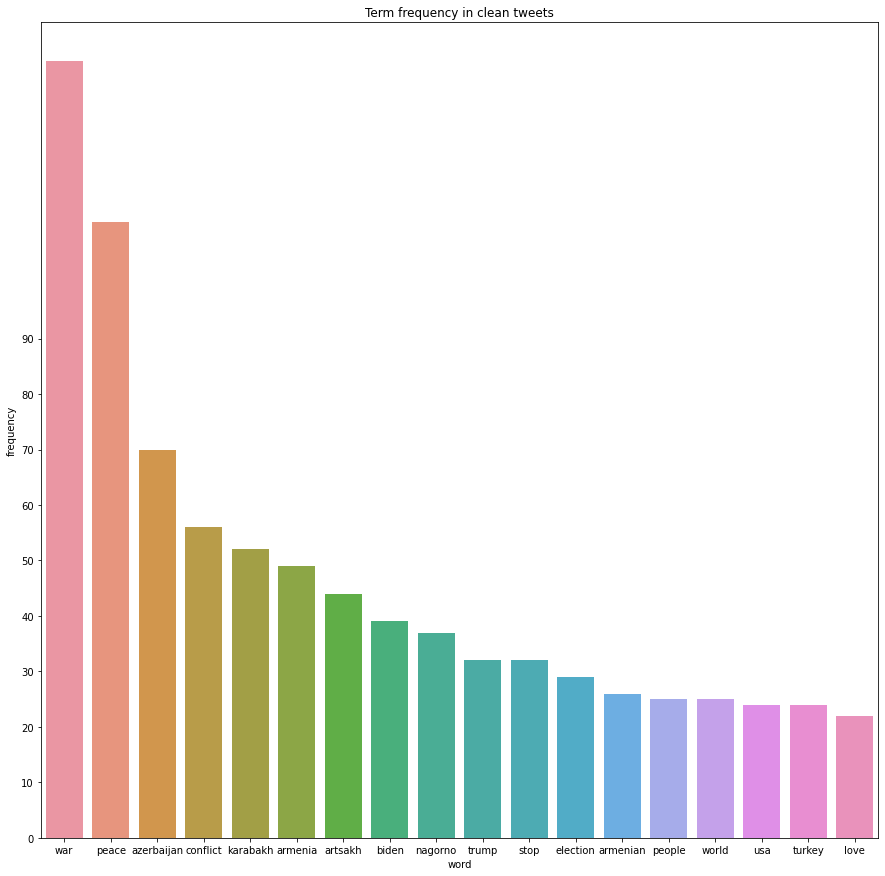

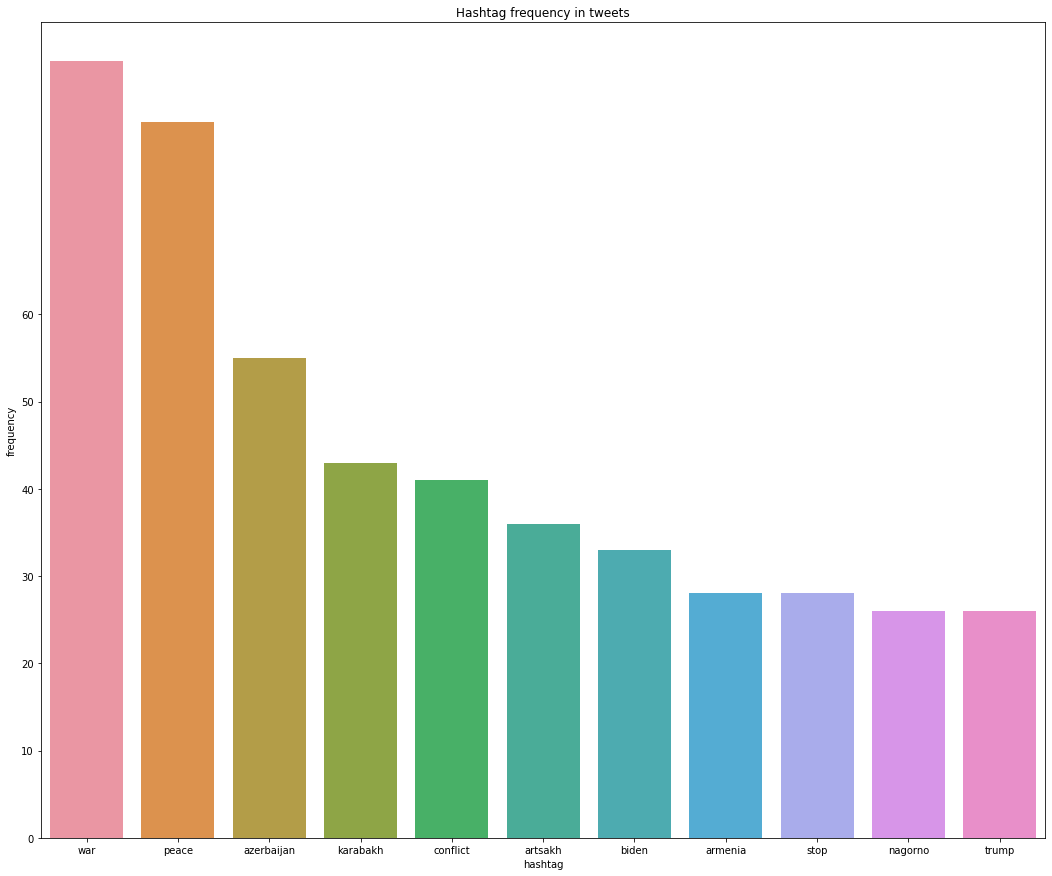

In [36]:
#Barplot fof frequency of terms in Clean_tweet

plt.figure(figsize=(15,15)) #Sets figure size

ax=sns.barplot(x="word",y="frequency", data=df_word_freq) #Creates a barchart for each word and its frequency
ax.set(title="Term frequency in clean tweets") #Sets the title
plt.yticks(np.arange(0,100,10)) #Sets the min, max values and tick size
plt.show()

#Barplot of frequency of terms in Clean_hashtags
plt.figure(figsize=(18,15)) #Sets figure size

hasht_ax=sns.barplot(x="hashtag",y="frequency", data=df_hasht_freq) #Creates a barchart for each word and its frequency
hasht_ax.set(title="Hashtag frequency in tweets") #Sets the title
plt.yticks(np.arange(0,70,10)) #Sets the min, max values and tick size
plt.show()

### Based on our findings from above, we now want to label tweets accordingly to their topic. For that reason, we will concentrate on the Armenia-Azerbaijan conflict and the US.

In [37]:
arm_aze_label = ['azerbaijan','armenia','armenian','azerbaijani','karabakh','nagorno','artsakh','aliyev']
usa_label = ['trump','obama','usa','harris','biden','us']
turkey_label = ['erdogan','turkey','istanbul']
covid_label = ['covid','covid19','corona','virus','pandemic','coronavirus']
yemen_label = ['yemen','yemeni']
africa_label = ['africa','ethiopia']

In [38]:
def get_labels(tweet):
    if any(words in tweet for words in arm_aze_label):
        return 'Azerbaijan_Armenia'
    elif any(words in tweet for words in usa_label):
        return 'USA'
    elif any(words in tweet for words in turkey_label):
        return 'Turkey'
    elif any(words in tweet for words in covid_label):
        return 'covid'
    elif any(words in tweet for words in yemen_label):
        return 'Yemen'
    elif any(words in tweet for words in africa_label):
        return 'Africa'
    else:
        return 'Other'


        

In [39]:
clean_tweets['Label'] = clean_tweets['Clean_tweet'].apply(get_labels)

print(clean_tweets.Label)

0                     USA
1                     USA
2                   covid
3                     USA
4                     USA
              ...        
245    Azerbaijan_Armenia
246                   USA
247                   USA
248                   USA
249                   USA
Name: Label, Length: 250, dtype: object


In [40]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [43]:
from geopy.geocoders import Nominatim

In [44]:
from geopy.extra.rate_limiter import RateLimiter

In [45]:
import folium 

In [46]:
from folium.plugins import FastMarkerCluster

In [47]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
clean_tweets['geo_location'] = clean_tweets['location'].apply(geocode)
clean_tweets['point'] = clean_tweets['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)
clean_tweets[['latitude', 'longitude','altitude']] = pd.DataFrame(clean_tweets['point'].tolist(), index=clean_tweets.index)

In [48]:
clean_tweets.head(5)

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count,geo_location,point,latitude,longitude,altitude,Label
0,plzhelpkids,157,"Anywhere, usa",cuban latino hispanic black voter election day...,cubans latinos hispanics black voter election ...,17,28,"(Anywhere Bicycle Repair, Opportunity Road, Ke...","(32.8256481, -117.1607283, 0.0)",32.825648,-117.160728,0.0,USA
1,bluestatestuff,21.7K,Rip City USA,democratic governor seriously consider call na...,stay safe denounce violence stronger together ...,8,18,"(Rip Van Winkle Bridge, Catskill, Town of Cats...","(42.2242011, -73.8535331, 0.0)",42.224201,-73.853533,0.0,USA
2,pastorrichman1,"2,440","Lagos, Nigeria",understand enjoy peace watch full video youtub...,peace peaceful covid19covid19uk faith viral vi...,22,29,"(Lagos, Lagos Island, 100242, Nigeria, (6.4550...","(6.4550575, 3.3941795, 0.0)",6.455057,3.394179,0.0,covid
3,myjehovahrapha,245,United States,god bless protect emergency personnel hospital...,truth covid19 peace trust god jesus public hea...,9,30,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,USA
4,JohnEWadeII,"1,747","New Orleans, US, 70130",dear god guide enthusiasm trump supporter tran...,god trump china joe biden corrupt school choic...,14,27,"(New Orleans, Orleans Parish, Louisiana, Unite...","(29.9499323, -90.0701156, 0.0)",29.949932,-90.070116,0.0,USA


In [49]:
clean_tweets.columns

Index(['username', 'followers', 'location', 'Clean_tweet', 'Clean_hashtags',
       'Hashtag_count', 'Word_count', 'geo_location', 'point', 'latitude',
       'longitude', 'altitude', 'Label'],
      dtype='object')

In [65]:
clean_tweets = clean_tweets[clean_tweets['geo_location'].notna()]
#clean_tweets = clean_tweets.drop(columns='point')
clean_tweets.reset_index(drop=True, inplace=True) #drops the index
clean_tweets.index.values.max() #returns the last row index of the data set

249

In [67]:
locations = clean_tweets.groupby(['location']).size().reset_index(name='location_count')
locations = locations.sort_values('location_count', ascending=False)
locations = locations.reset_index(drop=True)

locations.to_csv("location_count_november.csv", index=False)
locations.head()

,location,location_count
0,Armenia,12
1,United States,12
2,Azerbaijan,12
3,"Yerevan, Armenia",11
4,"Washington, DC",6


In [51]:
map1 = folium.Map()

clean_tweets.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)

map1

In [52]:
#add color to adjust marker color according to topic 

def topiccolors(Label):
    if Label == 'Azerbaijan_Armenia':
        return 'green'
    elif Label == 'USA':
        return 'blue'
    elif Label == 'Turkey':
        return 'black'
    elif Label == 'covid':
        return 'red'
    elif Label == 'Yemen':
        return 'purple'
    elif Label == 'Africa':
        return 'pink'
    else:
        return 'orange'
    
    
clean_tweets["color"] = clean_tweets['Label'].apply(topiccolors)
clean_tweets.head()

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count,geo_location,point,latitude,longitude,altitude,Label,color
0,plzhelpkids,157,"Anywhere, usa",cuban latino hispanic black voter election day...,cubans latinos hispanics black voter election ...,17,28,"(Anywhere Bicycle Repair, Opportunity Road, Ke...","(32.8256481, -117.1607283, 0.0)",32.825648,-117.160728,0.0,USA,blue
1,bluestatestuff,21.7K,Rip City USA,democratic governor seriously consider call na...,stay safe denounce violence stronger together ...,8,18,"(Rip Van Winkle Bridge, Catskill, Town of Cats...","(42.2242011, -73.8535331, 0.0)",42.224201,-73.853533,0.0,USA,blue
2,pastorrichman1,"2,440","Lagos, Nigeria",understand enjoy peace watch full video youtub...,peace peaceful covid19covid19uk faith viral vi...,22,29,"(Lagos, Lagos Island, 100242, Nigeria, (6.4550...","(6.4550575, 3.3941795, 0.0)",6.455057,3.394179,0.0,covid,red
3,myjehovahrapha,245,United States,god bless protect emergency personnel hospital...,truth covid19 peace trust god jesus public hea...,9,30,"(United States, (39.7837304, -100.4458825))","(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0,USA,blue
4,JohnEWadeII,"1,747","New Orleans, US, 70130",dear god guide enthusiasm trump supporter tran...,god trump china joe biden corrupt school choic...,14,27,"(New Orleans, Orleans Parish, Louisiana, Unite...","(29.9499323, -90.0701156, 0.0)",29.949932,-90.070116,0.0,USA,blue


In [53]:
pip install -U datapane

Requirement already up-to-date: datapane in /opt/conda/lib/python3.7/site-packages (0.8.6)
Note: you may need to restart the kernel to use updated packages.


In [54]:
import datapane as dp
dp.login(token='bd458975153e1524cb99cbe1ada66120d5866c20')

Connected successfully to https://datapane.com as linnva


In [55]:
df=clean_tweets.loc[:,("Clean_tweet","Label","latitude","longitude","color")]

In [56]:
map5 = folium.Map()

locations = clean_tweets[['latitude','longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[3]


for point in range(0, len(locationlist)):
    popup = popup ='<strong>' + clean_tweets['Label'][point]+'</strong>'
    folium.Marker(locationlist[point], popup= popup, icon=folium.Icon(color=clean_tweets["color"][point])).add_to(map5)
map5

map5.save('november_final_tweets.html')

report = dp.Report(
    dp.Plot(map5), 
    dp.Table(df)
)
# report.save(path='report.html', open=True)
report.publish(name='November Peace and Conflict Tweet Map', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/linnva/reports/november-peace-and-conflict-tweet-map/


In [57]:
folium_map = folium.Map(location=[38, -97],
                        zoom_start=4.4,
                        tiles='CartoDB dark_matter')

FastMarkerCluster(data=list(zip(clean_tweets['latitude'].values, clean_tweets['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map

folium_map.save('november_final_counts.html')

report = dp.Report(
    dp.Plot(folium_map), 
    dp.Table(df)
)
# report.save(path='report.html', open=True)
report.publish(name='November Twitter Count Map', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/linnva/reports/november-twitter-count-map/
